## Chargement des données de santé

In [1]:
import numpy as np 

donnees_sante = np.genfromtxt("donnees_sante.csv", delimiter=",")
nLig, nCol = donnees_sante.shape
print(f"On a {nLig} lignes et {nCol} colonnes")

On a 768 lignes et 9 colonnes


# Exercices

Voir le sujet donné sur papier

In [2]:
#il faut faire le split nous même, 80% entraînement (et ensuite entraînement et validation) et 20% test
#classification binaire

# Données d'entraînement

In [3]:
#données d'entraînement du modèle, environ 3/4 des 80% des données de santé
train_data = donnees_sante[:462,0:8]
train_label = donnees_sante[:462,-1] 
print(train_data.shape)
print(train_label.shape)

#données de validation, environ 1/4 de 80% des données de santé, permet d'ajuster les hyperparamètres
validation_data = donnees_sante[462:615,0:8]
validation_label = donnees_sante[462:615,-1] 
print(validation_data.shape)
print(validation_label.shape)

(462, 8)
(462,)
(153, 8)
(153,)


# Données de test

In [4]:
#données de test, environ 20%, permet de vérifier notre modèle avec des données qu'il n'a jamais vu
test_data = donnees_sante[615:,0:8]
test_label = donnees_sante[615:,-1] 
print(test_data.shape)
print(test_label.shape)

(153, 8)
(153,)


# Normalisation des données

In [5]:
#pour que chaque paramètre ai autant d'impact pour le modèle
mean = train_data.mean(axis=0) #calcul la moyenne pour chaque colonne
std = train_data.std(axis=0) #calcul l'écart type de chaque colonne

#données de training
train_data -= mean
train_data /= std

#données de validation
validation_data -= mean
validation_data /= std

#données de test
test_data -= mean
test_data /= std

# Création du réseau de neurones

In [6]:
#essayer pour différents hyperparamètres : nbr de couches, nbr de neurones, nbr d'epochs, batch size

#importation des bibliothèques
from tensorflow import keras
from tensorflow.keras import layers

#construction du modèle
#nbr de neurones en puissance de 2
def get_model():
    model = keras.Sequential([
        layers.Dense(32, activation="relu"), #relu(x)=max(x, 0)
        layers.Dense(32, activation="relu"),
        layers.Dense(1, activation="sigmoid") #binaire => sigmoid et un seul neurone
    ])
    #compilation du modèle
    model.compile(optimizer="rmsprop", #détermine comment le "learning" progresse
                  loss="binary_crossentropy", #définie le feedback utilisé pour "learning", classification binaire
                  metrics=["accuracy"]) #évalue la performance du modèle
    return model

model = get_model()


#entraînement du modèle
history = model.fit(
    train_data,train_label,
    epochs=200,#nbr d'itérations
    batch_size=64, #taille d'un lot d'entraînement, prendre un batch de petite taille
    validation_data=(validation_data, validation_label))

Epoch 1/200
8/8 [==============================] - 1s 26ms/step - loss: 0.6735 - accuracy: 0.6082 - val_loss: 0.6117 - val_accuracy: 0.7843
Epoch 2/200
8/8 [==============================] - 0s 5ms/step - loss: 0.6268 - accuracy: 0.6688 - val_loss: 0.5799 - val_accuracy: 0.8039
Epoch 3/200
8/8 [==============================] - 0s 4ms/step - loss: 0.5966 - accuracy: 0.7165 - val_loss: 0.5405 - val_accuracy: 0.8301
Epoch 4/200
8/8 [==============================] - 0s 8ms/step - loss: 0.5706 - accuracy: 0.7316 - val_loss: 0.5129 - val_accuracy: 0.8170
Epoch 5/200
8/8 [==============================] - 0s 4ms/step - loss: 0.5501 - accuracy: 0.7446 - val_loss: 0.4902 - val_accuracy: 0.8235
Epoch 6/200
8/8 [==============================] - 0s 4ms/step - loss: 0.5341 - accuracy: 0.7532 - val_loss: 0.4700 - val_accuracy: 0.8235
Epoch 7/200
8/8 [==============================] - 0s 5ms/step - loss: 0.5219 - accuracy: 0.7511 - val_loss: 0.4577 - val_accuracy: 0.8366
Epoch 8/200
8/8 [=========

8/8 [==============================] - 0s 5ms/step - loss: 0.4151 - accuracy: 0.8052 - val_loss: 0.3991 - val_accuracy: 0.8497
Epoch 60/200
8/8 [==============================] - 0s 7ms/step - loss: 0.4139 - accuracy: 0.8074 - val_loss: 0.4042 - val_accuracy: 0.8627
Epoch 61/200
8/8 [==============================] - 0s 4ms/step - loss: 0.4133 - accuracy: 0.8030 - val_loss: 0.4031 - val_accuracy: 0.8497
Epoch 62/200
8/8 [==============================] - 0s 5ms/step - loss: 0.4120 - accuracy: 0.8009 - val_loss: 0.3974 - val_accuracy: 0.8497
Epoch 63/200
8/8 [==============================] - 0s 4ms/step - loss: 0.4113 - accuracy: 0.8052 - val_loss: 0.4004 - val_accuracy: 0.8497
Epoch 64/200
8/8 [==============================] - 0s 5ms/step - loss: 0.4093 - accuracy: 0.8009 - val_loss: 0.4098 - val_accuracy: 0.8301
Epoch 65/200
8/8 [==============================] - 0s 4ms/step - loss: 0.4087 - accuracy: 0.8030 - val_loss: 0.4059 - val_accuracy: 0.8301
Epoch 66/200
8/8 [===============

8/8 [==============================] - 0s 4ms/step - loss: 0.3681 - accuracy: 0.8377 - val_loss: 0.4293 - val_accuracy: 0.8301
Epoch 118/200
8/8 [==============================] - 0s 5ms/step - loss: 0.3665 - accuracy: 0.8355 - val_loss: 0.4429 - val_accuracy: 0.8105
Epoch 119/200
8/8 [==============================] - 0s 4ms/step - loss: 0.3654 - accuracy: 0.8485 - val_loss: 0.4363 - val_accuracy: 0.8105
Epoch 120/200
8/8 [==============================] - 0s 7ms/step - loss: 0.3656 - accuracy: 0.8398 - val_loss: 0.4374 - val_accuracy: 0.8170
Epoch 121/200
8/8 [==============================] - 0s 4ms/step - loss: 0.3649 - accuracy: 0.8420 - val_loss: 0.4464 - val_accuracy: 0.7974
Epoch 122/200
8/8 [==============================] - 0s 7ms/step - loss: 0.3621 - accuracy: 0.8442 - val_loss: 0.4329 - val_accuracy: 0.8301
Epoch 123/200
8/8 [==============================] - 0s 5ms/step - loss: 0.3627 - accuracy: 0.8420 - val_loss: 0.4400 - val_accuracy: 0.8105
Epoch 124/200
8/8 [========

8/8 [==============================] - 0s 5ms/step - loss: 0.3229 - accuracy: 0.8636 - val_loss: 0.4846 - val_accuracy: 0.7908
Epoch 176/200
8/8 [==============================] - 0s 7ms/step - loss: 0.3209 - accuracy: 0.8658 - val_loss: 0.4887 - val_accuracy: 0.7843
Epoch 177/200
8/8 [==============================] - 0s 5ms/step - loss: 0.3205 - accuracy: 0.8615 - val_loss: 0.4846 - val_accuracy: 0.7843
Epoch 178/200
8/8 [==============================] - 0s 7ms/step - loss: 0.3196 - accuracy: 0.8636 - val_loss: 0.5047 - val_accuracy: 0.7778
Epoch 179/200
8/8 [==============================] - 0s 4ms/step - loss: 0.3214 - accuracy: 0.8615 - val_loss: 0.5039 - val_accuracy: 0.7778
Epoch 180/200
8/8 [==============================] - 0s 5ms/step - loss: 0.3191 - accuracy: 0.8571 - val_loss: 0.4962 - val_accuracy: 0.7843
Epoch 181/200
8/8 [==============================] - 0s 4ms/step - loss: 0.3176 - accuracy: 0.8680 - val_loss: 0.4976 - val_accuracy: 0.7778
Epoch 182/200
8/8 [========

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                288       
                                                                 
 dense_1 (Dense)             (None, 32)                1056      
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 1377 (5.38 KB)
Trainable params: 1377 (5.38 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


# Evolution de la fonction de perte

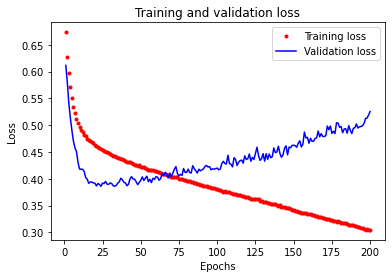

In [8]:
import matplotlib.pyplot as plt

history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "r.", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

# Zoom pour trouver le bon nbr d'epochs

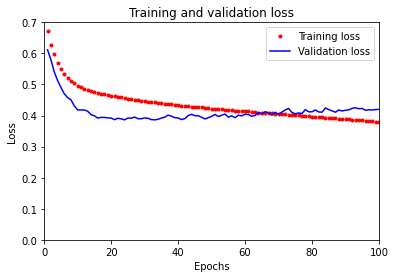

In [9]:
import matplotlib.pyplot as plt

history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "r.", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.ylim(0,0.7)
plt.xlim(0,100)
plt.legend()
plt.show()

# Evolution de l'accuracy

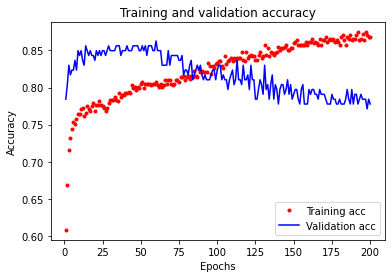

In [10]:
plt.clf()

acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]

plt.plot(epochs, acc, "r.", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()
#si accuracy saccadé => pas assez de données

# Résultat pour les données de test

In [11]:
model = get_model()
model.fit(train_data, train_label, 
          epochs=40, batch_size=32, verbose=0)

predictions = model(test_data)
predictions = predictions.numpy()
predicted_labels = np.argmax(predictions, axis=1)
matches = predicted_labels == test_label
print(f"accuracy: {matches.mean():.2f}")

accuracy: 0.65


# Test sur le nouveau cas

In [12]:
nouvelle_patiente = np.array([[1,122,70,27,0,36.8,0.34,27]])
nouvelle_patiente -= mean
nouvelle_patiente /= std
prediction = model(nouvelle_patiente)
prediction = prediction.numpy()
prediction

array([[0.47391003]], dtype=float32)

# Méthode kfold

In [13]:
k = 4
num_val_samples = len(train_data) // k
num_epochs = 200
all_loss_histories = []
all_val_loss_histories = []
all_acc_histories = []
all_val_acc_histories = []
for i in range(k):
    print(f"Processing fold #{i}")
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_labels = train_label[i * num_val_samples: (i + 1) * num_val_samples]
    partial_train_data = np.concatenate(
        [train_data[:i * num_val_samples],
         train_data[(i + 1) * num_val_samples:]],
        axis=0)
    partial_train_labels = np.concatenate(
        [train_label[:i * num_val_samples],
         train_label[(i + 1) * num_val_samples:]],
        axis=0)
    model = get_model()
    history = model.fit(partial_train_data, partial_train_labels,
                        validation_data=(val_data, val_labels),
                        epochs=num_epochs, batch_size=32, verbose=0)
    all_loss_histories.append(history.history["loss"])
    all_val_loss_histories.append(history.history["val_loss"])
    all_acc_histories.append(history.history["accuracy"])
    all_val_acc_histories.append(history.history["val_accuracy"])
    
    
    average_loss = [
    np.mean([x[i] for x in all_loss_histories]) for i in range(num_epochs)]
average_val_loss = [
    np.mean([x[i] for x in all_val_loss_histories]) for i in range(num_epochs)]
average_acc = [
    np.mean([x[i] for x in all_acc_histories]) for i in range(num_epochs)]
average_val_acc = [
    np.mean([x[i] for x in all_val_acc_histories]) for i in range(num_epochs)]

Processing fold #0
Processing fold #1
Processing fold #2
Processing fold #3


# fonction de perte kfold

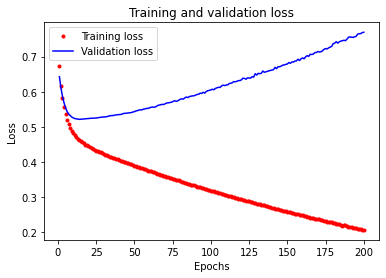

In [14]:
import matplotlib.pyplot as plt
epochs = range(1, len(average_loss) + 1)
plt.plot(epochs, average_loss, "r.", label="Training loss")
plt.plot(epochs, average_val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

# Accuracy kfold

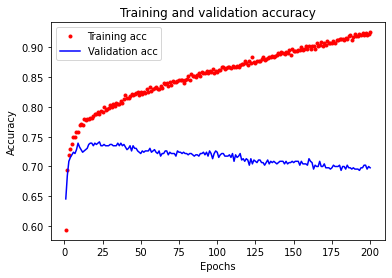

In [15]:
plt.clf()
plt.plot(epochs, average_acc, "r.", label="Training acc")
plt.plot(epochs, average_val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

# Approche multiclass